# 분석 2주차 과제

# 1. LinearRegression

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 단순선형회귀
list_y = []
# 1부터 20까지 X data를 만들어주었습니다.
X = np.arange(1,21) 
# X에 임의의 수를 더해 임의의 Y data를 만듭니다.
for x in X:
    list_y.append(x+np.random.randint(6))
Y = np.array(list_y)
df = pd.DataFrame({'X':X,'Y':Y})

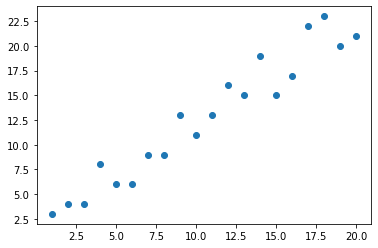

In [3]:
# 데이터 확인
plt.scatter(X,Y)

**LinearRegressoion을 이용하여 X data에 대해 학습을 진행한 후 직선의 방정식을 구해주세요.**

[답] : 0.91428571x + 3.4999999999999982

In [4]:
# 모델 생성 후 학습시키기
X = X.reshape(-1,1)

model = LinearRegression()
model.fit(X,Y)
pred = model.predict(X)
coef = model.coef_
intercept = model.intercept_

In [5]:
# 회귀계수 구해보기
print('coef', coef)

coef [1.0481203]


In [6]:
# 상수항 구해보기
print('intercept', intercept)

intercept 1.694736842105259


**X data에 대해 예측을 수행한 후, 그래프를 통해 학습데이터와 회귀직선을 나타내보세요.**

<function matplotlib.pyplot.show(close=None, block=None)>

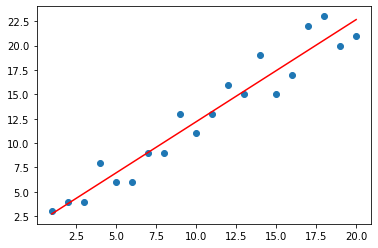

In [7]:
# X data에 대해 예측
# 점(학습데이터)들 찍어보기
plt.scatter(X, Y)
# 회귀직선 그려보기
plt.plot(X, pred, c='r')
plt.show

**회귀분석 평가지표 중 하나를 골라 구해보세요**
- MSE, RMSE, R2_score 등

In [8]:
# 여기에 구해보세요!
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y, pred)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}\nRMSE : {1:.3f}'.format(mse, rmse))
print('R2_score : {0:.3f}'.format(r2_score(Y, pred)))

MSE : 2.583
RMSE : 1.607
R2_score : 0.934


# Logistic Regression

In [9]:
# 사이킷런의 데이터셋 로드
from sklearn.datasets import load_breast_cancer

In [10]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)
df["label"] = breast_cancer.target
df.columns = [ col.replace(" ", "_") for col in df.columns]

In [11]:
# 데이터가 잘 로드되었는지 확인해보세요
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'label'],
      dtype='object')

## **[변수 설명]** 
radius : 반경(중심에서 외벽까지 거리들이 평균값) <br>
texture : 질감 <br>
perimeter : 둘레 <br>
area : 면적 <br>
smoothness : 매끄러움 <br>
compactness : 조그만 정도<br>
concavity : 오목함(윤곽의 오목한 부분의 정도)<br>
points : 오목한 점의 수<br>
symmetry : 대칭<br>
dimension : 프랙탈 차원<br>

In [13]:
# 이번엔 mean이 들어간 변수만 사용해보겠습니다!
# mean이 들어간 변수만 따로 뽑아 X와 Y데이터를 만들어주세요.
df.columns.str.startswith('mean')==True
X = df.iloc[:, :10]
Y = df[['label']]

In [14]:
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


**Heatmap을 통해 X변수 간 상관관계를 확인해보세요!**

<AxesSubplot:title={'center':'Correaltion of Features'}>

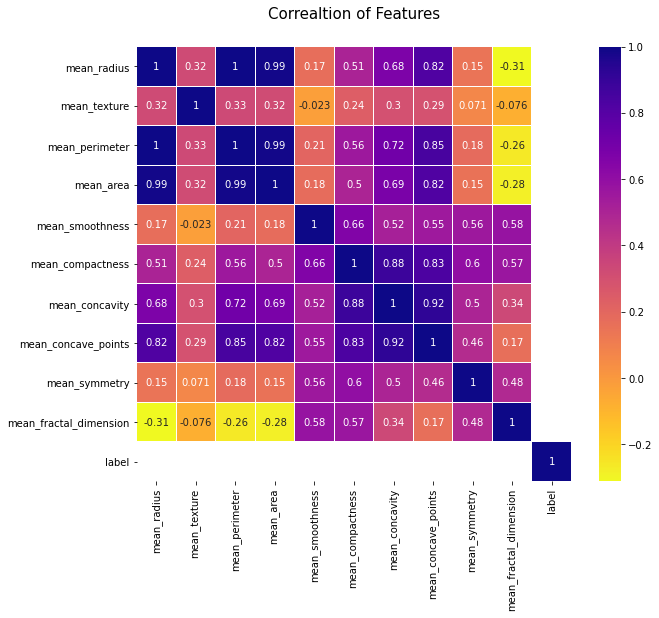

In [15]:
# heatmap을 통해 상관관계 확인
import seaborn as sns
data = pd.concat([X,Y])
colormap = plt.cm.plasma_r
plt.figure(figsize=(10,8))
plt.title('Correaltion of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

**강한 상관관계가 있는 변수들을 적어보세요!
그리고 다중공선성과 그로 인한 문제에 대해 서술해주세요.**

[답] : 
상관관계의 제곱 R-Squared가 0.9가 넘게되면 VIF가 10이되어 다중공선성이 존재한다고 판단한다.
- mean_radius와 mean_area, mean_perimeter 변수간의 상관관계존재

일반적으로 회귀분석에서는 각 피쳐들간의 독립성을 가정한다. 하지만 피쳐들간의 다중공선성이 존재한다면 더 이상 독립적이라고 말할 수 없다. 따라서 다중공선성이 존재하는채로 학습을 진행한다면 독립 변수 각각이 종속 변수를 정확하게 설명할 수 없게되어 성능이 낮아질 수 있다.

**강한 상관관계를 가진 변수 중 일부 변수를 선택하여 X 변수를 다시 만들어주세요.**

<AxesSubplot:title={'center':'Correaltion of Features'}>

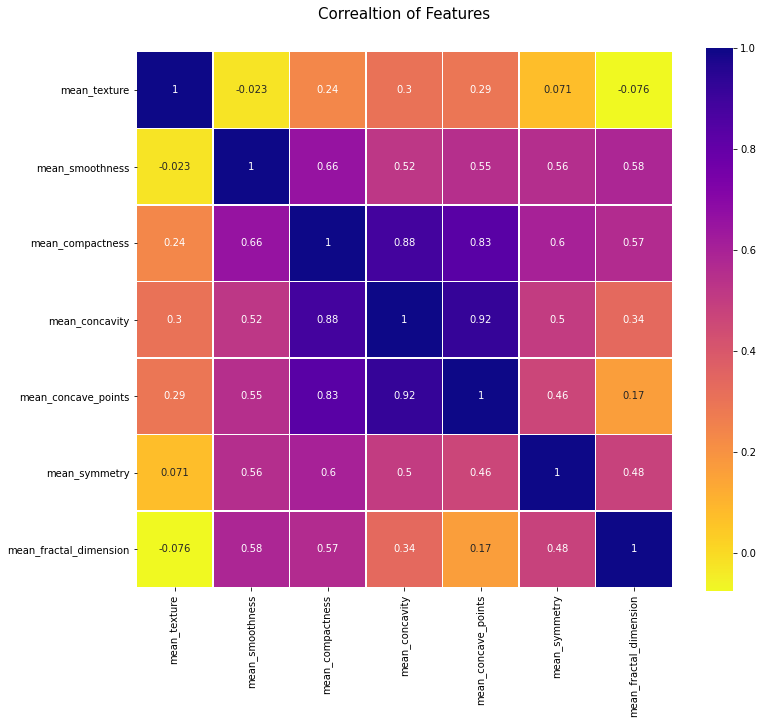

In [16]:
X = X.drop(['mean_radius','mean_area','mean_perimeter'], axis=1)
plt.figure(figsize=(12,10))
plt.title('Correaltion of Features', y=1.05, size=15)
sns.heatmap(X.astype(float).corr(), linewidths=0.5, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

In [17]:
from sklearn.model_selection import train_test_split

# 학습 데이터와 테스트 데이터 분할
X_tr,X_te,Y_tr,Y_te = train_test_split(X,Y, test_size=0.3, random_state=1)

**로지스틱 회귀 모델 생성 후, test data에 대해 예측을 수행해주세요.**

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_tr,Y_tr)
pred = log_reg.predict(X_te)

**Confusion Matrix를 구하고 이를 이용하여 accuracy, precision, recall을 직접 구해보세요!**

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

confusion_matrix(Y_te, pred)

array([[33, 30],
       [11, 97]], dtype=int64)

In [20]:
# accuracy
print('정확도 : ', accuracy_score(Y_te, pred))

정확도 :  0.7602339181286549


In [21]:
# precision
print('정밀도 : ', precision_score(Y_te, pred))

정밀도 :  0.7637795275590551


In [22]:
# recall
print('재현율 : ', recall_score(Y_te, pred))

재현율 :  0.8981481481481481


**회귀계수를 구해보고 그 중 변수 2개를 골라 결과를 해석해보세요! (logit관점/odds관점) **

[답]:   
mean_texture의 계수는 -0.219 mean_smoothness의 계수는 -0.498
로짓 관점에서 보면 각 변수가 1증가할 때 -0.219, -0.498만큼 증가합니다.
odds 관점에서 보면 각 변수가 1증가할 때 exp(-0.219), exp(-0.498)만큼 증가합니다.

array([-0.21994685, -0.49740467, -2.65246133, -4.95677472, -3.09314095,
       -0.84032838,  0.16056528])

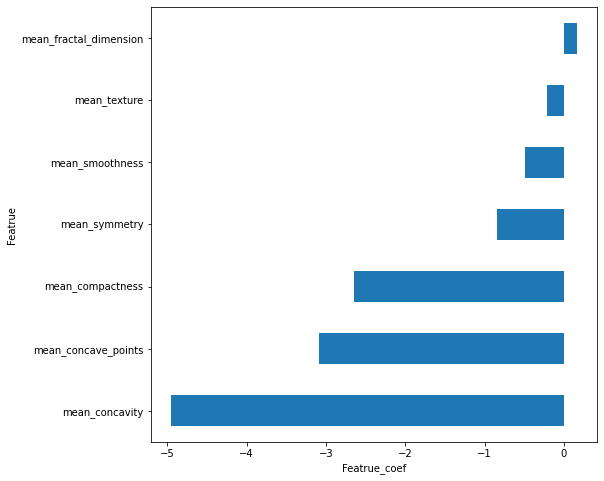

In [23]:
# 로지스틱 회귀의 회귀계수
coef = log_reg.coef_.reshape(-1)
display(coef)

from pandas import Series 
Series_feat_coef = pd.Series(coef, index=X.columns)

plt.figure(figsize=(8,8))
Series_feat_coef.sort_values(ascending=True).plot.barh()
plt.xlabel('Featrue_coef')
plt.ylabel('Featrue')
plt.show()

### 주어진 데이터셋을 이용하여 주어진 문제를 해결해주세요.

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## - Feature Scaling

In [25]:
from sklearn.datasets import load_iris

#iris 데이터셋 로드
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### 1. iris 데이터셋에 MinMaxScaler를 적용하고 각 칼럼별 평균과 분산을 구하세요.

In [26]:
from sklearn.preprocessing import MinMaxScaler

M_scaler = MinMaxScaler()
M_scaled = M_scaler.fit_transform(iris_df)
M_scaled = pd.DataFrame(M_scaled, columns = iris_df.columns)

print('{0:=^25}'.format('각 Feature의 평균'))
print(M_scaled.mean())
print('\n{0:=^25}'.format('각 Feature의 분산'))
print(M_scaled.var())

======각 Feature의 평균======
sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64

======각 Feature의 분산======
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


#### 2. iris 데이터셋에 StandardScaler를 적용하고 각 칼럼별 평균과 분산을 구하세요.

In [27]:
from sklearn.preprocessing import StandardScaler

S_scaler = StandardScaler()
S_scaled = S_scaler.fit_transform(iris_df)
S_scaled = pd.DataFrame(S_scaled, columns = iris_df.columns)

print('{0:=^25}'.format('각 Feature의 평균'))
print(S_scaled.mean())
print('\n{0:=^25}'.format('각 Feature의 분산'))
print(S_scaled.var())

======각 Feature의 평균======
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

======각 Feature의 분산======
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### 3. normalization과 standardization의 차이점을 설명하세요.

### 여기에 작성
- 1번은 MinMaxScaler로 스케일링을 실시했을 때 데이터값을 0과 1사이의 범위 값으로 변환해줍니다. (음수가 있을 경우 -1에서 1값으로 변환) 스케일링을 실시해도 데이터의 분포는 형태가 거의 유지된채로 조절되는 결과를 볼 수 있다.

- 2번은 표준화로 정규분포 즉 평균:0, 분산:1의 값으로 변환해준다. 정규분포를 가정하고 알고리즘을 학습하게되는 회귀모델, 로지스틱회귀모델, 서포트 벡터 머신에서 주로 사용하는 스케일링 방법입니다.

## - Regularization

In [28]:
from sklearn.datasets import load_boston

#boston 집값 데이터셋 로드
boston=load_boston()
boston_price=boston.target
boston_data=boston.data
boston_df=pd.DataFrame(data=boston_data, columns=boston.feature_names)

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


#### 4. training data와 test data를 분리해주세요(비율 자유)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston_data, boston_price,
                                          test_size=0.3, random_state=1)

#### 5. LinearRegression, Ridge, Lasso 각각의 방법으로 모델을 학습시키고 예측하여 RMSE값을 구해주세요. 세 경우의 RMSE값을 비교해주세요.

In [30]:
# LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
lr_pred = lr_reg.predict(X_test)
lr_mse = mean_squared_error(lr_pred , y_test)
lr_rmse = np.sqrt(lr_mse)

print('lr_rmse:{0:.3f}'.format(lr_rmse))

lr_rmse:4.453


In [31]:
#Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
ridge_mse = mean_squared_error(ridge_pred , y_test)
ridge_rmse = np.sqrt(ridge_mse)

print('ridge_rmse:{0:.3f}'.format(ridge_rmse))

ridge_rmse:4.397


In [32]:
#Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(lasso_pred , y_test)
lasso_rmse = np.sqrt(lasso_mse)

print('lasso_rmse:{0:.3f}'.format(lasso_rmse))

lasso_rmse:5.504


In [33]:
#RMSE과 비교
print('lr_rmse:{0:.3f}'.format(lr_rmse))
print('ridge_rmse:{0:.3f}'.format(ridge_rmse))
print('lasso_rmse:{0:.3f}'.format(lasso_rmse))

lr_rmse:4.453
ridge_rmse:4.397
lasso_rmse:5.504


# 수고하셨습니다 :D